### Codio Activity 15.9: Stochastic Gradient Descent

This activity explores the use of the `SGDRegressor` from scikitlearn.  While there is not a standard gradient descent estimator, the more efficient example of stochastic gradient descent is available.  You will use the earlier credit dataset to explore its use and learn an important lesson about scaling your data with gradient descent methods. 

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
credit = pd.read_csv('codio_15_3_solution/data/Credit.csv', index_col=0)

In [4]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [5]:
X = credit[['Income', 'Limit']]
y = credit['Balance']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Problem 1

#### Fitting a basic Linear Regression model

To begin, use the `LinearRegression` with all default parameters to build a model on the training data and evaluate this on the testing data.  Assign the estimator to `lr` below and training and testing error to `train_mse` and `test_mse` respectively.

In [7]:
lr = LinearRegression().fit(X_train, y_train)
train_mse = mean_squared_error(y_train, lr.predict(X_train))
test_mse = mean_squared_error(y_test, lr.predict(X_test))

In [8]:
print(train_mse)
print(test_mse)

25672.74539586416
31919.424629039913


### Problem 2

#### Fitting a basic SGD model

To begin, use the `SGDRegressor` with all default parameters **except** `random_state = 42` to build a model on the training data and evaluate this on the testing data.  Assign the estimator to `sgd_defaults` below.

In [9]:
sgd_defaults = SGDRegressor(random_state=42).fit(X_train, y_train)
train_mse = mean_squared_error(y_train, sgd_defaults.predict(X_train))
test_mse = mean_squared_error(y_test, sgd_defaults.predict(X_test))

print(sgd_defaults)
print(train_mse)
print(test_mse)

SGDRegressor(random_state=42)
3.6275553225769765e+30
3.398878498272584e+30


### Problem 3

#### Scaling the Data

An important message in gradient descent methods is that scaling the data and using regularization helps to constrain the solution path.  You should be able to see the effect of providing the `SGDRegressor` scaled data below.  Fit a second model using the scaled data below and compare the mean squared error to that of the standard `LinearRegression` estimator.  Assign the estimator with `random_state` to `sgd_scaled` below and the train and test mean squared error to `train_mse` and `test_mse` respectively.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_ts_scaled = scaler.transform(X_test)

In [12]:
sgd_scaled = SGDRegressor(random_state = 42).fit(X_tr_scaled, y_train)
train_mse = mean_squared_error(y_train, sgd_scaled.predict(X_tr_scaled))
test_mse = mean_squared_error(y_test, sgd_scaled.predict(X_ts_scaled))

In [13]:
print(sgd_scaled)
print(train_mse)
print(test_mse)

SGDRegressor(random_state=42)
25685.3994812086
32139.44899835043


You can return to your earlier examples and see if scaling your data made any differences in the gradient descent convergence, this is important to all models using a gradient descent method and you will see this again with neural networks.

### Codio Activity 15.10: Comparing Gradient Descent to Stochastic Gradient Descent

This activity focuses on comparing the convergence and speed of gradient descent and stochastic gradient descent.  First, you will use a synthetic dataset to explore the convergence with naive implementations.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression, SGDRegressor
import warnings
warnings.simplefilter(action='ignore')

### Functions and Data

Below you are given an `mse` and `df` functions for computing the gradient descent update.  Also, a simple linear dataset is built around the line $y = 3x$ with gaussian noise added.  You are to explore the convergence behavior of both stochastic gradient descent and gradient descent to the "true" coefficient $\beta_0 = 3$. 

In [5]:
#synthetic dataset y = 3x
np.random.seed(42)
X = pd.DataFrame(np.linspace(0,10,100))
y = 3*X + np.random.normal(scale = 5, size = 100).reshape(-1,1)
X.head()
y

,0
0,2.483571
1,-0.388291
2,3.844503
3,8.524240
4,0.041354
...,...
95,21.470304
96,30.571510
97,30.699216
98,29.722537


In [6]:
#mean squared error function
def mse(theta, X = X, y = y):
    return np.mean((y- theta*X)**2)

In [7]:
#derivative function for mse
def df(theta, X = X, y = y):
    return (mse(theta + 0.001, X = X, y = y) - mse(theta,X = X, y = y))/0.001

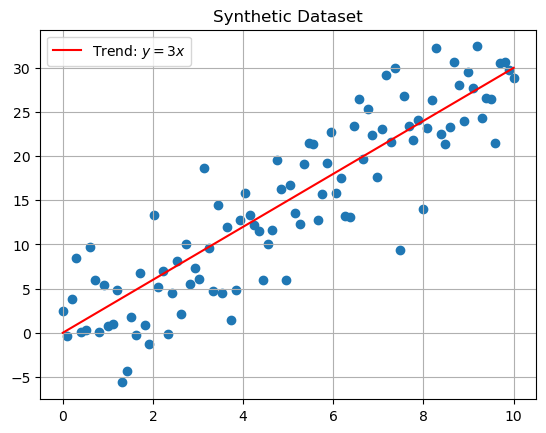

In [8]:
#dataset and "true" line
xs = np.linspace(0, 10, 100)
plt.scatter(X, y)
plt.plot(xs, 3*xs, color = 'red', label = r'Trend: $y = 3x$')
plt.title('Synthetic Dataset')
plt.grid()
plt.legend();

### Problem 1

#### Gradient Descent

Below, complete the update to determine `theta_next` using gradient descent and a step size of 0.001.  Note to leave the `%time` magic command that will time your final execution of the loop.

In [14]:
thetas = [5]
for i in range(200):
    # complete the gradient descent update
    theta_next = thetas[-1] - 0.001*df(theta = thetas[-1])
    #print(theta_next)
    #break
    thetas.append(theta_next)

[np.float64(2.9395105740065013), np.float64(2.939510401596465), np.float64(2.9395102407384748), np.float64(2.939510090658519), np.float64(2.93950995063442)]


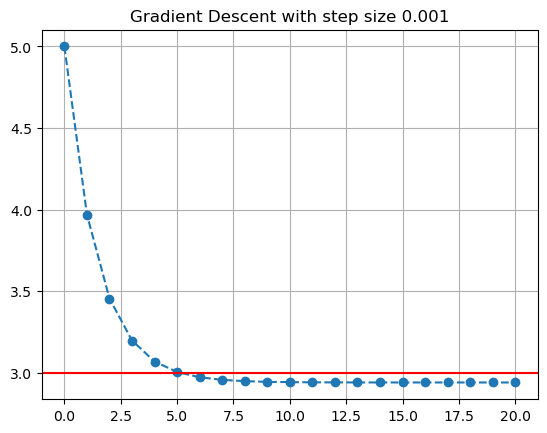

In [15]:
print(thetas[-5:])
plt.plot(thetas[::10], '--o')
plt.axhline(3, color = 'red')
plt.grid()
plt.title('Gradient Descent with step size 0.001');

### Problem 2

#### SGD implementation

Below, complete the gradient descent update using SGD where the sample is determined by the variable `x_sample`.  Use this and `y_sample` to compute the update and append this to `thetas_sgd`. Note the execution time.

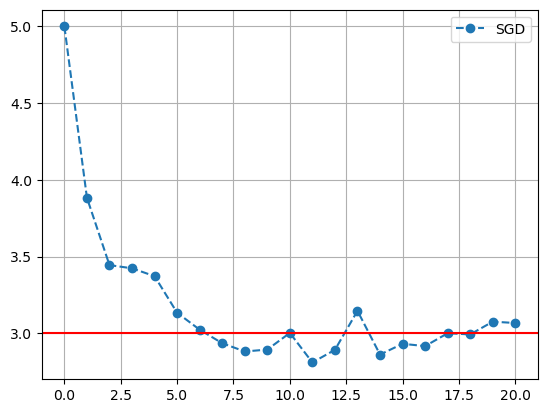

In [17]:
thetas_sgd = [5]
for i in range(200):
    x_sample = X.sample(1, random_state = i)
    y_sample = y.iloc[x_sample.index.values]
    x_next = thetas_sgd[-1] - 0.001*df(theta = thetas_sgd[-1], X = x_sample, y = y_sample)
    thetas_sgd.append(x_next)

plt.plot(thetas_sgd[::10], '--o', label = 'SGD')
plt.axhline(3, color = 'red')
plt.grid()
plt.legend();

### Problem 3

#### Comparing Convergence

Below, examine the plot comparing our SGD vs. Gradient Descent implementations.  Which of the following seems to be true?

```
a. Both methods converge and took similar time
b. Both methods converge but SGD is much faster
c. Neither method converged
d. Only SGD converged.
```

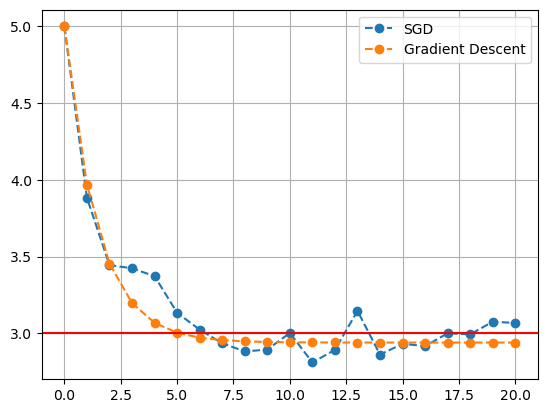

In [18]:
plt.plot(thetas_sgd[::10], '--o', label = 'SGD')
plt.plot(thetas[::10], '--o', label = 'Gradient Descent')
plt.axhline(3, color = 'red')
plt.grid()
plt.legend();

In [19]:
ans3 = 'a'

### Problem 4

#### Why isn't `SGD` faster?

It may have surprised you that using the SGD approach did not result in much of a speed difference.  This is mainly due to the size of the array and scale of the problem.  As stated in the scikitlearn `SGDRegressor` user guide [here](https://scikit-learn.org/stable/modules/sgd.html#regression), SGD will usually require a larger number of observations to be noticeably faster.  How many samples does `sklearn` suggest this is?

```
a. > 1000
b. > 10,000
c. > 100,000
d. > 1,000,000
```

In [20]:
ans4 = 'b'

### Bias Variance Trade Off

This activity focuses on using the `SGDRegressor` to train differing complexity models.  You will compare models on a synthetic dataset and determine if these are high or low bias and high or low variance based on the residuals of the model.  In this assignment it is important to visualize histograms of the residuals as a method to determine the nature of bias and variance as well as the scatterplot against the model prediction plots provided.


#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

### The Data

Below a fifth degree polynomial function is created and noise added.  You are to compare the error of different model complexities and determine the nature of bias and variance in the model. 

**NOTE**: You are provided the feature data as polynomials for each problem -- there are no interaction terms necessary here and scikitlearn does not have an easy way of eliminating these terms using `PolynomialFeatures`. Also, when evaluating the model please use the test data for describing the variance of the estimator.

In [22]:
def f(x): 
    np.random.seed(42)
    return 14.2*(x + 1)*x*(x - 1)**3 + np.random.normal(scale = 1, size = len(x))

In [23]:
X = np.linspace(-1, 1, 100)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, f(X).reshape(-1, 1), random_state=42)
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
X_ts_scaled = scaler.transform(X_test.reshape(-1, 1))

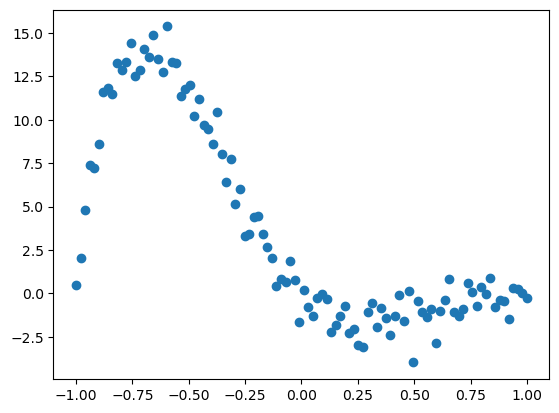

In [25]:
plt.scatter(X, f(X))

In [26]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)

### Problem 1

#### Linear Model and Error

Below, build a first degree model using the scaled data and the `SGDRegressor`.  Plot the results and visualize the errors.  Is this model high bias?  Also, be sure to note the variance of the model.  Enter your solutions as a string corresponding to the correct answer choice for the resulting model.

```
a. High Bias
b. Low Bias
```

In [27]:
scaler = StandardScaler()
#train and test data
X_tr_scaled = scaler.fit_transform(X_train)
X_ts_scaled = scaler.transform(X_test)

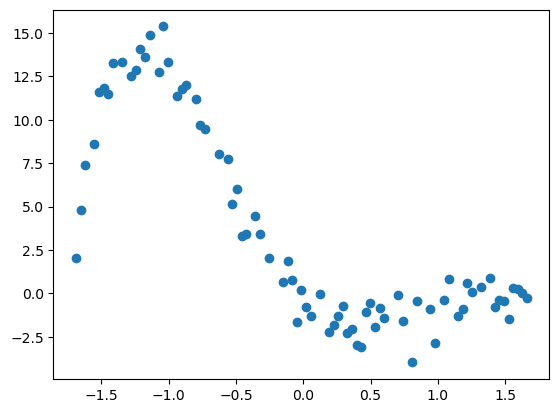

In [36]:
plt.scatter(X_tr_scaled,y_train)
#print(X_ts_scaled)

In [28]:
ans1 = 'b'

### Problem 2

#### Quadratic Model and Error

Below, build a second degree model using the scaled data and the `SGDRegressor`.  Plot the results and visualize the errors.  Is this model high bias?  Is this model higher, lower, or similar variance to that of the linear model?  Enter your solutions as `ans2` as a string corresponding to the correct answer choice for the resulting model.

```
a. High Bias and Higher Variance
b. High Bias and Lower Variance
c. Low Bias and Higher Variance
d. Low Bias and Lower Variance
e. High Bias and Simlilar Variance
f. Low Bias and Similar Variance
```

In [29]:
k = 2
X_train_quad = np.hstack([X_tr_scaled**(i+1) for i in range(1, k)])
X_test_quad = np.hstack([X_ts_scaled**(i+1) for i in range(1, k)])

In [30]:
ans = 'c'

### Problem 3

#### $5^{th}$ degree Model and Error

Below, build a fifth degree model using the scaled data and the `SGDRegressor`.  Plot the results and visualize the errors.  Is this model high or low bias?  Is this model higher, lower, or similar variance to that of the **linear model**?  Enter your solutions as a string corresponding to the correct answer choice for the resulting model.

```
a. High Bias and Higher Variance
b. High Bias and Lower Variance
c. Low Bias and Higher Variance
d. Low Bias and Lower Variance
e. High Bias and Simlilar Variance
f. Low Bias and Similar Variance
```

In [31]:
k = 5
X_train_5 = np.hstack([X_tr_scaled**(i+1) for i in range(1, k)])
X_test_5 = np.hstack([X_ts_scaled**(i+1) for i in range(1, k)])

In [32]:
ans3 = 'd'

In this example, we manufactured a cubic polynomial and seem to have arrived at a higher complexity model as the optimal choice.  This seems to demonstrate a bit of the idea that going beyond the model complexity may find variance dipping again.  However, please note it took some work to get the parameters of the polynomial in the right place for this to happen -- so sometimes less complexity may be better and sometimes more.  Of greater importance is that you consider how to evaluate and compare the bias and variance in multiple models while building regressors.